In [989]:
import pandas as pd
import numpy as np

In [990]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [991]:
import seaborn as sns
import matplotlib.pyplot as plt

In [992]:
import joblib

In [993]:
data = pd.read_csv("adult 3.csv")

In [994]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [995]:
data.shape

(48842, 15)

In [996]:
data.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [997]:
data.tail(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [998]:
#Null Values
data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [999]:
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [1000]:
data['occupation'].value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
?,2809
Transport-moving,2355


In [1001]:
data['gender'].value_counts()

,count
gender,
Male,32650
Female,16192


In [1002]:
data['education'].value_counts()

,count
education,
HS-grad,15784
Some-college,10878
Bachelors,8025
Masters,2657
Assoc-voc,2061
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955


In [1003]:
data['workclass'].value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
?,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [1004]:
data['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,22379
Never-married,16117
Divorced,6633
Separated,1530
Widowed,1518
Married-spouse-absent,628
Married-AF-spouse,37


In [1005]:
data['occupation'].replace({'?': 'Others'})

,occupation
0,Machine-op-inspct
1,Farming-fishing
2,Protective-serv
3,Machine-op-inspct
4,Others
...,...
48837,Tech-support
48838,Machine-op-inspct
48839,Adm-clerical
48840,Adm-clerical


In [1006]:
data['workclass'].value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
?,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [1007]:
data = data[data['education'] != '5th-6th']
data = data[data['education'] != '1st-4th']
data = data[data['education'] != 'Preschool']
data['education'].value_counts()

,count
education,
HS-grad,15784
Some-college,10878
Bachelors,8025
Masters,2657
Assoc-voc,2061
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955


In [1008]:
data.shape

(48003, 15)

In [1009]:
data = data[data['workclass'] != 'Without-pay']
data = data[data['workclass'] != 'Never-worked']
data['workclass'].value_counts()

,count
workclass,
Private,33231
Self-emp-not-inc,3808
Local-gov,3114
?,2730
State-gov,1974
Self-emp-inc,1685
Federal-gov,1430


In [1010]:
data['workclass'] = data['workclass'].replace('?', 'Other')
data['occupation'] = data['occupation'].replace('?', 'Other')
data['native-country'] = data['native-country'].replace('?', 'Other')

In [1011]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Other,103497,Some-college,10,Never-married,Other,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [1012]:
if 'experience' not in data.columns:
    data['experience'] = np.random.randint(0, 40, size=len(data))

In [1013]:
data.loc[:, 'age_edu'] = data['age'] * data['educational-num']

In [1014]:
encoder = LabelEncoder()
cat_cols = ['workclass', 'marital-status', 'education', 'occupation',
            'relationship', 'race', 'gender', 'occupation',
            'native-country', 'income']

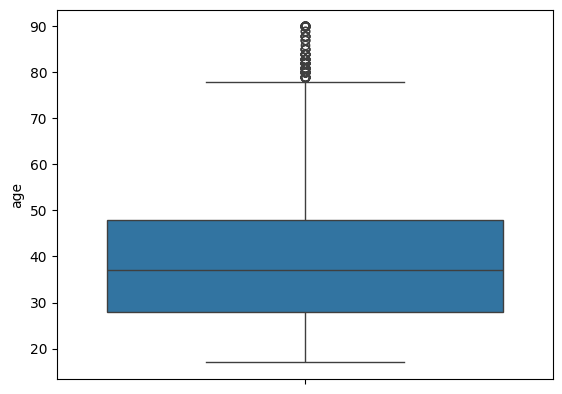

In [1015]:
# outlier detection
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data['age'])
plt.show()

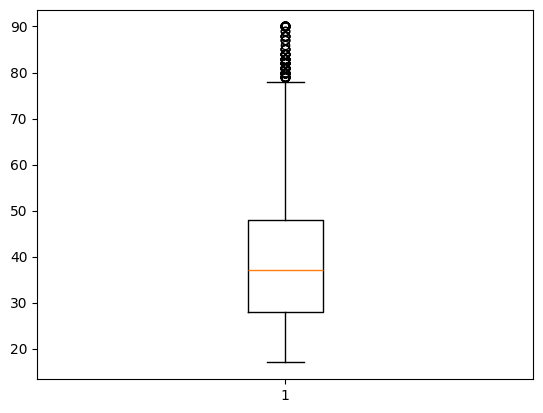

In [1016]:
plt.boxplot(data['age'])
plt.show()

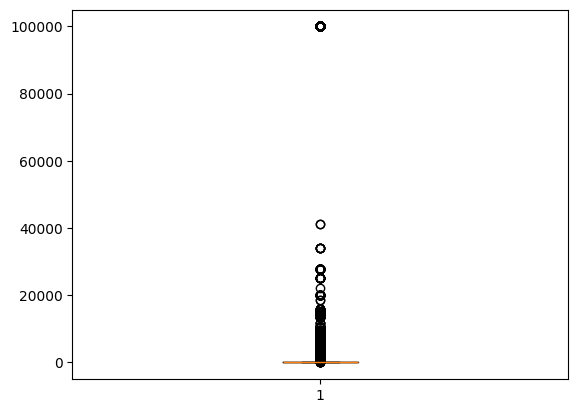

In [1017]:
plt.boxplot(data['capital-gain'])
plt.show()

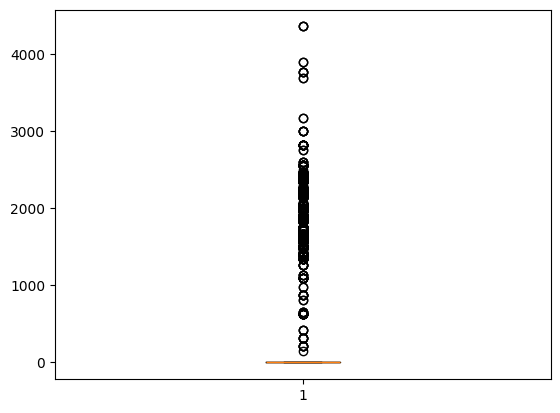

In [1018]:
plt.boxplot(data['capital-loss'])
plt.show()

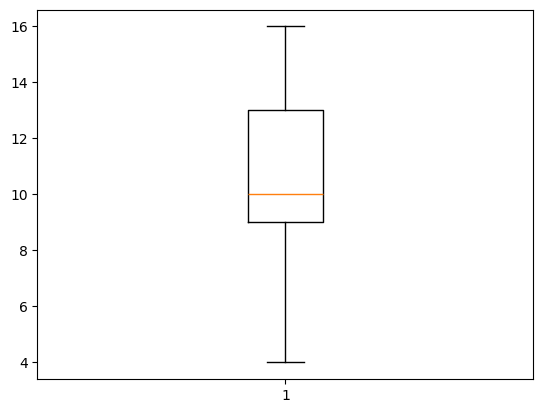

In [1019]:
plt.boxplot(data['educational-num'])
plt.show()

In [1020]:
encoder = LabelEncoder()
cat_cols = ['workclass', 'marital-status', 'education', 'occupation',
            'relationship', 'race', 'gender', 'occupation',
            'native-country', 'income']

In [1021]:
for col in cat_cols:
    data.loc[:, col] = encoder.fit_transform(data[col])


In [1022]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,experience,age_edu
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,39,0,12,175
1,38,3,89814,9,9,2,4,0,4,1,0,0,50,39,0,5,342
2,28,1,336951,5,12,2,11,0,4,1,0,0,40,39,1,30,336
3,44,3,160323,12,10,2,6,0,2,1,7688,0,40,39,1,25,440
4,18,2,103497,12,10,4,7,3,4,0,0,0,30,39,0,36,180


In [1023]:
print("Shape:", data.shape)
print("\nMissing values per column:")
print(data.isna().sum())

Shape: (47972, 17)

Missing values per column:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
experience         0
age_edu            0
dtype: int64


In [1024]:
X = data[['age', 'education', 'occupation', 'hours-per-week', 'experience']]
y = data['income']

In [1025]:
X

,age,education,occupation,hours-per-week,experience
0,25,1,6,40,12
1,38,9,4,50,5
2,28,5,11,40,30
3,44,12,6,40,25
4,18,12,7,30,36
...,...,...,...,...,...
48837,27,5,13,38,18
48838,40,9,6,40,32
48839,58,9,0,40,39
48840,22,9,0,20,35


In [1026]:
y

,income
0,0
1,0
2,1
3,1
4,0
...,...
48837,0
48838,1
48839,0
48840,0


In [1027]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.10958904, 0.08333333, 0.42857143, 0.39795918, 0.30769231],
       [0.28767123, 0.75      , 0.28571429, 0.5       , 0.12820513],
       [0.15068493, 0.41666667, 0.78571429, 0.39795918, 0.76923077],
       ...,
       [0.56164384, 0.75      , 0.        , 0.39795918, 1.        ],
       [0.06849315, 0.75      , 0.        , 0.19387755, 0.8974359 ],
       [0.47945205, 0.75      , 0.21428571, 0.39795918, 0.        ]])

In [1028]:
print(y.unique())
print(y.dtype)

[0 1]
object


In [1029]:
y = y.astype(int)

In [1030]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [1031]:
X

array([[0.10958904, 0.08333333, 0.42857143, 0.39795918, 0.30769231],
       [0.28767123, 0.75      , 0.28571429, 0.5       , 0.12820513],
       [0.15068493, 0.41666667, 0.78571429, 0.39795918, 0.76923077],
       ...,
       [0.56164384, 0.75      , 0.        , 0.39795918, 1.        ],
       [0.06849315, 0.75      , 0.        , 0.19387755, 0.8974359 ],
       [0.47945205, 0.75      , 0.21428571, 0.39795918, 0.        ]])

In [1032]:
y = y.astype(int)

In [1033]:
# Scale numeric columns
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [1034]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (38377, 5)
X_test shape: (9595, 5)
y_train shape: (38377,)
y_test shape: (9595,)


In [1035]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_preds = logistic_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_preds))


Logistic Regression Accuracy: 0.7496612819176655


In [1036]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [1037]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier()
}

results = {}

In [1038]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"\n✅ Best Model: {best_model_name} with Accuracy {results[best_model_name]:.4f}")

import joblib
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved as best_model.pkl")

LogisticRegression: 0.7497
DecisionTree: 0.7364
KNN: 0.7681
SVM: 0.7592
RandomForest: 0.7711
GradientBoosting: 0.8011

✅ Best Model: GradientBoosting with Accuracy 0.8011
✅ Saved as best_model.pkl


In [1039]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [1040]:
y_pred = best_model.predict(X_test)

In [1041]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7265
           1       0.64      0.41      0.50      2330

    accuracy                           0.80      9595
   macro avg       0.74      0.67      0.69      9595
weighted avg       0.78      0.80      0.78      9595



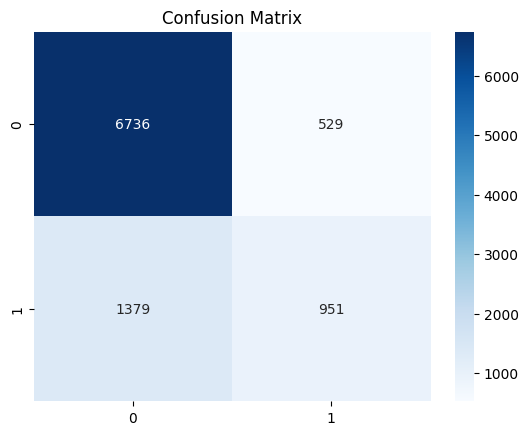

In [1042]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

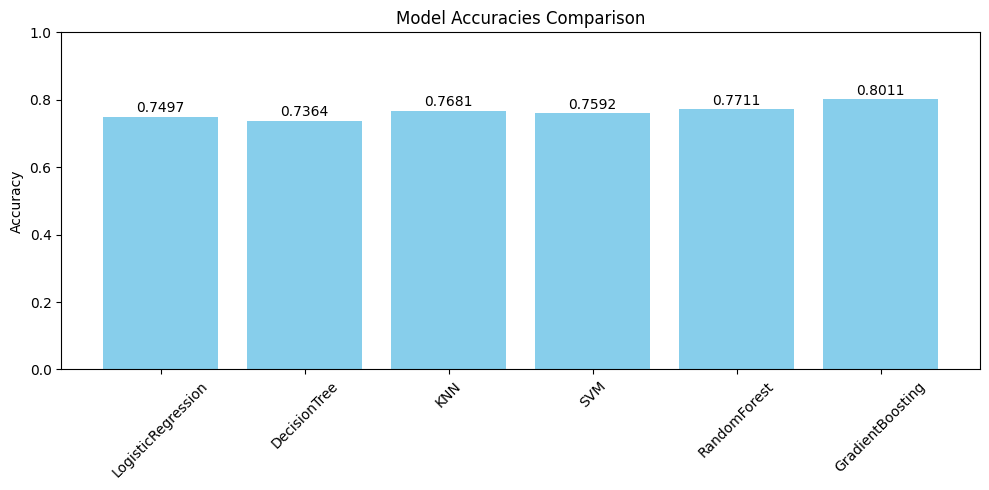

In [1043]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
bars = plt.bar(results.keys(), results.values(), color='skyblue')

plt.title("Model Accuracies Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.005,
        f"{yval:.4f}",
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()


In [1044]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib

# Load trained model
model = joblib.load("best_model.pkl")

# Page config
st.set_page_config(page_title="Employee Salary Classification", page_icon="🎯", layout="centered")
st.title("🎯Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or <=50K based on input features.")

# Sidebar inputs
st.sidebar.header("Input Employee Details")
age = st.sidebar.slider("Age", 18, 65, 30)

education = st.sidebar.selectbox(
    "Education Level",
    ["7th-8th", "9th", "10th", "11th", "12th",
     "HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm",
     "Bachelors", "Masters", "Prof-school", "Doctorate"]
)

# Must match the mapping you used for LabelEncoder
education_map = {
    "7th-8th": 1, "9th": 2, "10th": 3, "11th": 4, "12th": 5,
    "HS-grad": 6, "Some-college": 7, "Assoc-voc": 8, "Assoc-acdm": 9,
    "Bachelors": 10, "Masters": 11, "Prof-school": 12, "Doctorate": 13
}

education_num = education_map[education]
occupation = st.sidebar.selectbox(
    "Occupation",
    ["Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial",
     "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct", "Adm-clerical",
     "Farming-fishing", "Transport-moving", "Priv-house-serv", "Protective-serv",
     "Armed-Forces"]
)

# Use the same mapping you got from training:
occupation_map = {
    "Tech-support": 0,
    "Craft-repair": 1,
    "Other-service": 2,
    "Sales": 3,
    "Exec-managerial": 4,
    "Prof-specialty": 5,
    "Handlers-cleaners": 6,
    "Machine-op-inspct": 7,
    "Adm-clerical": 8,
    "Farming-fishing": 9,
    "Transport-moving": 10,
    "Priv-house-serv": 11,
    "Protective-serv": 12,
    "Armed-Forces": 13
}

occupation_num = occupation_map[occupation]


# Hours per week
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)

# Experience
experience = st.sidebar.slider("Years of Experience", 0, 40, 5)

# Create DataFrame exactly matching training columns
input_df = pd.DataFrame({
    "age": [age],
    "education": [education_num],  # <-- use number, not string!
    "occupation": [occupation_num],
    "hours-per-week": [hours_per_week],
    "experience": [experience]
})

st.write("### Input Data")
st.write(input_df)

# Predict button
if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    if prediction[0] == 1:
        st.success("Prediction: >50K")
    else:
        st.success("Prediction: <=50K")

# Batch prediction
st.markdown("---")
st.markdown("#### Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())

    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("Predictions:")
    st.write(batch_data.head())

    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')

Overwriting app.py


In [1045]:
!pip install streamlit pyngrok

In [1046]:
!ngrok authtoken 30BlQJbFWReq5sWTdMmOvpvQJ24_3vLUiKFQA71EmcvRNJNn6

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [1047]:
import os
import threading

def run():
    os.system('streamlit run app.py --server.port 8501')

thread = threading.Thread(target=run)
thread.start()

In [1048]:
from pyngrok import ngrok
import time

# Give Streamlit time to start
time.sleep(10)

# Kill old tunnels if any
ngrok.kill()

# Open a new tunnel — only once
public_url = ngrok.connect(8501)
print("✅ Your Streamlit app is live here:", public_url)


✅ Your Streamlit app is live here: NgrokTunnel: "https://0b24e7d02bca.ngrok-free.app" -> "http://localhost:8501"
